<a href="https://colab.research.google.com/github/adkprakash/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
from nltk.corpus import stopwords

In [3]:
from google.colab import drive

In [4]:
# Mount your Google Drive (authorization required)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Path to your CSV file in Google Drive
data_path='drive/My Drive/Dataset'

In [6]:
# Read the CSV file using pandas
data = pd.read_csv(data_path+'/netflix_reviews.csv')

In [7]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d123acad-4c26-41c2-97b0-592f46758853,Nikshia Bhaiwa,This is amazing app,5,0,8.114.0 build 19 50680,2024-05-18 23:04:55,8.114.0 build 19 50680
1,3370bed7-4d52-4e14-b9b8-0282138b708e,Pilot Seleam,"Unsubscribing ! , now i cant open it on my oth...",1,0,8.114.0 build 19 50680,2024-05-18 22:41:23,8.114.0 build 19 50680
2,87bc75a8-81b9-4220-8843-05d0d58f154e,nomthandazo patience,I've been trying to install this app it doesn'...,1,0,8.101.1 build 7 50601,2024-05-18 22:37:34,8.101.1 build 7 50601
3,2cb4ce60-ba5a-4a8b-b878-3df7e41d1b02,Eseme Kelly,Great App 🔥,5,0,8.108.0 build 2 50642,2024-05-18 22:33:34,8.108.0 build 2 50642
4,9ebc48ff-a622-45e8-a3b3-881f612fd016,Eitan Craft24,No me dejaba ver nada porque no estaba en mi casa,1,0,8.114.0 build 19 50680,2024-05-18 21:59:12,8.114.0 build 19 50680


In [8]:
# Dropping unwanted column by name
drop_column=['reviewId','userName','reviewCreatedVersion','at','appVersion']
data = data.drop(drop_column, axis=1)

In [9]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cant open it on my oth...",1,0
2,I've been trying to install this app it doesn'...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109211 entries, 0 to 109210
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        109211 non-null  object
 1   score          109211 non-null  int64 
 2   thumbsUpCount  109211 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [11]:
data['score'].value_counts()

score
1    42775
5    30635
4    13576
3    11698
2    10527
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

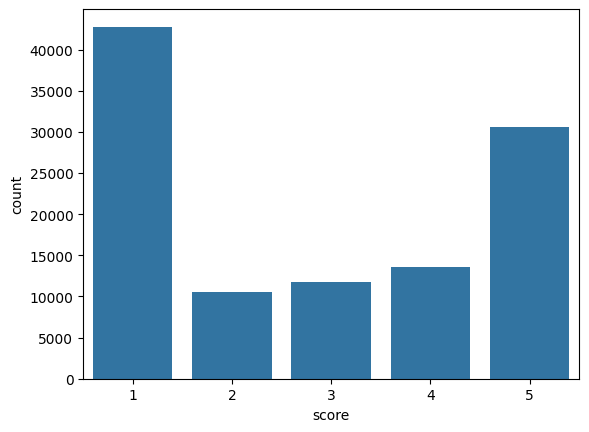

In [12]:
sns.countplot(x='score',data=data)

In [13]:
# Count unique values
num_unique_values = data['thumbsUpCount'].nunique()

# Print the result
print(f"Number of unique values in 'thumbsUpCount': {num_unique_values}")

Number of unique values in 'thumbsUpCount': 899


In [14]:
data['thumbsUpCount'].describe()

count    109211.000000
mean         10.798473
std         102.097338
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64

In [15]:
data['thumbsUpCount'].mean()

10.79847268132331

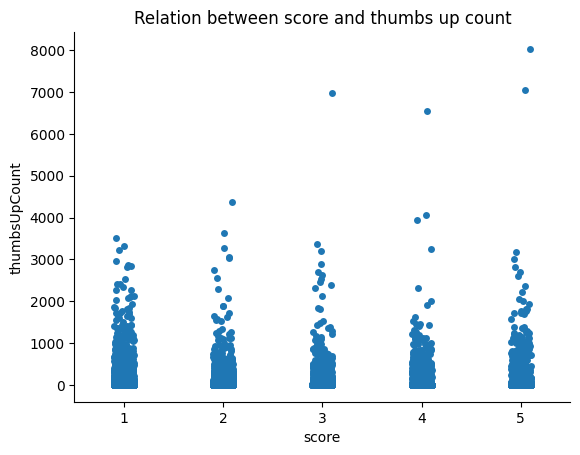

In [16]:
# Creating a strip plot
sns.stripplot(
    x = "score",
    y = "thumbsUpCount",
    data=data
)

# Customize the plot
sns.despine()  # Remove grid lines for cleaner visuals
plt.title("Relation between score and thumbs up count")  # Add a title

# Display the plot
plt.show()


In [17]:
# Setting a threshold score to separate positive and negative reviews
threshold = 3

def convert_to_review(score):
  if score < threshold:
    return "negative"
  else:
    return "positive"

# Applying the conversion function to the "score" column
data['score'] = data['score'].apply(convert_to_review)

In [18]:
data['score'].value_counts()

score
positive    55909
negative    53302
Name: count, dtype: int64

In [19]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,positive,0
1,"Unsubscribing ! , now i cant open it on my oth...",negative,0
2,I've been trying to install this app it doesn'...,negative,0
3,Great App 🔥,positive,0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0


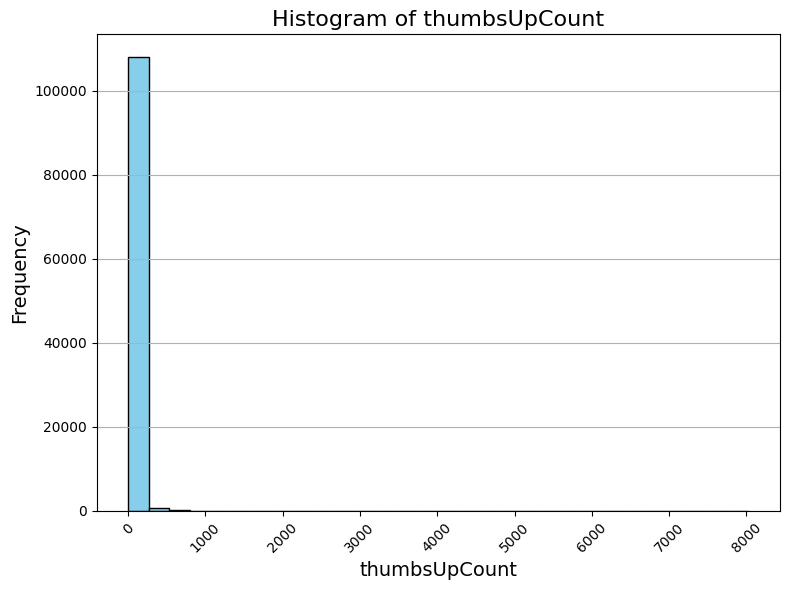

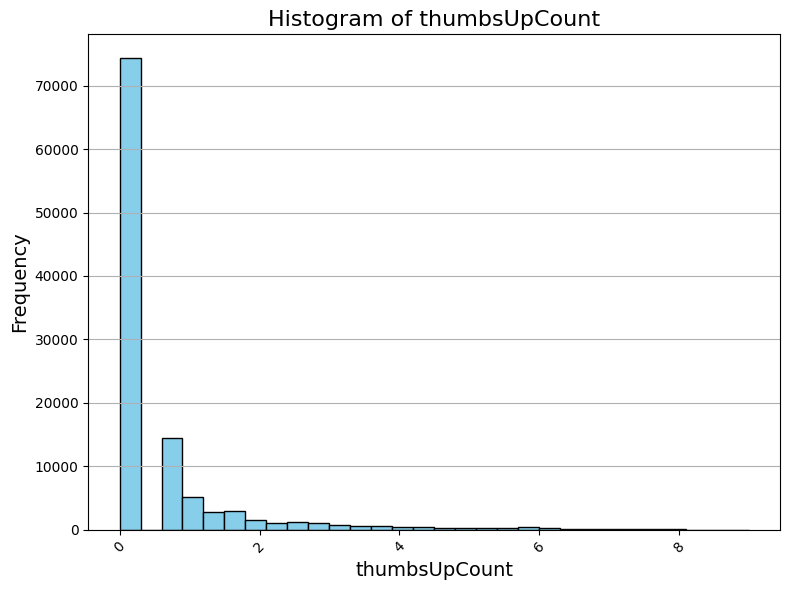

In [20]:
# Creating a hsitogram of thumbsUpCount
plt.figure(figsize=(8,6))
plt.hist(data['thumbsUpCount'], bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a hsitogram of thumbsUpCount after normalization using log
plt.figure(figsize=(8,6))
plt.hist(np.log(data['thumbsUpCount']+1), bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Preprocessing

In [21]:
# Text Normalizaton
# Installing contractions library for Expanding Contractions
!pip install contractions

#Importing contractions library
import contractions
# Defining a function to expand contractions
def expand_contractions(text):
    try:
        return contractions.fix(text)
    except Exception as e:
        # Handle the exception (e.g., return original text or log the error)
        return text

# Applying the function to the 'content' column using apply
data['content'] = data['content'].apply(expand_contractions)


In [22]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,positive,0
1,"Unsubscribing ! , now i cannot open it on my o...",negative,0
2,I have been trying to install this app it does...,negative,0
3,Great App 🔥,positive,0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0


In [23]:
#removing special characters during text normalization
# Defining a function to remove special characters
def remove_special_characters(text, allowed_chars=set()):
  # Defining a set of special characters to remove
  special_chars = set("""!"#$%&'()*+,/:;<=>?@[]\\^_`{|}~""")

  # Removing special characters except for those in allowed_chars
  filtered_text = ''.join([char for char in text if char not in special_chars or char in allowed_chars])
  return filtered_text

In [24]:
# Applying the function to the 'content' column using apply
data['content'] = data['content'].apply(expand_contractions)

In [25]:
# Lowercase the 'content' column
data['content'] = data['content'].str.lower()

In [26]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,"unsubscribing ! , now i cannot open it on my o...",negative,0
2,i have been trying to install this app it does...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [27]:
import string
# Define function to remove punctuation
def remove_punctuation(text):

  punctuation = string.punctuation
  return ''.join([char for char in text if char not in punctuation])

# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(remove_punctuation)

In [28]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cannot open it on my oth...,negative,0
2,i have been trying to install this app it does...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [29]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# Defining function to perform lemmatization
def lemmatize_text(text):

  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in text.lower().split()]
  return ' '.join(words)

# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(lemmatize_text)

In [31]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cannot open it on my other...,negative,0
2,i have been trying to install this app it doe ...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [32]:
from wordcloud import WordCloud

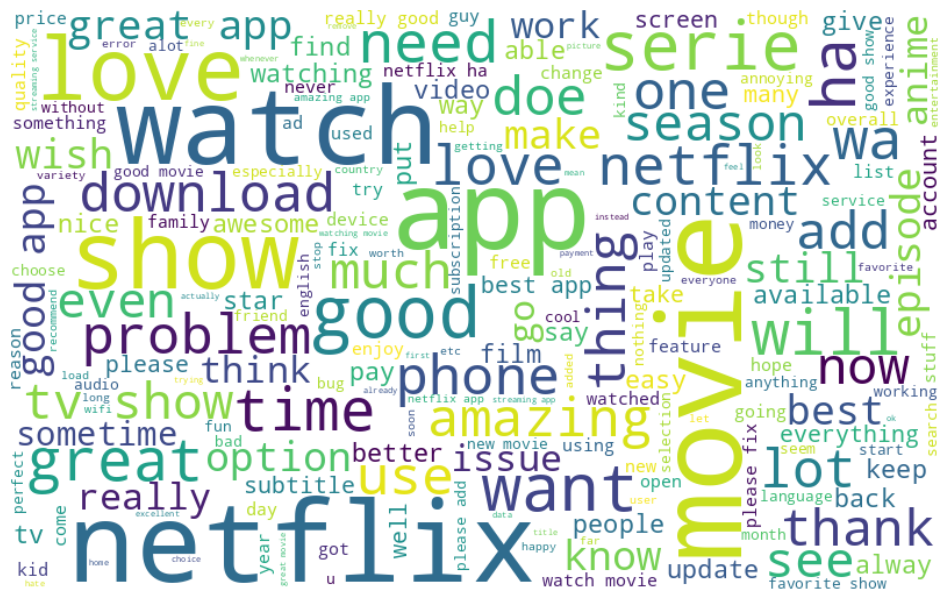

In [33]:
reviews= ' '.join(words for words in data['content'][data['score']== 'positive'].astype(str))
worldcloud= WordCloud(width=800,height=500,max_font_size=100,background_color='white').generate(reviews)
plt.figure(figsize=(12,10))
plt.imshow(worldcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

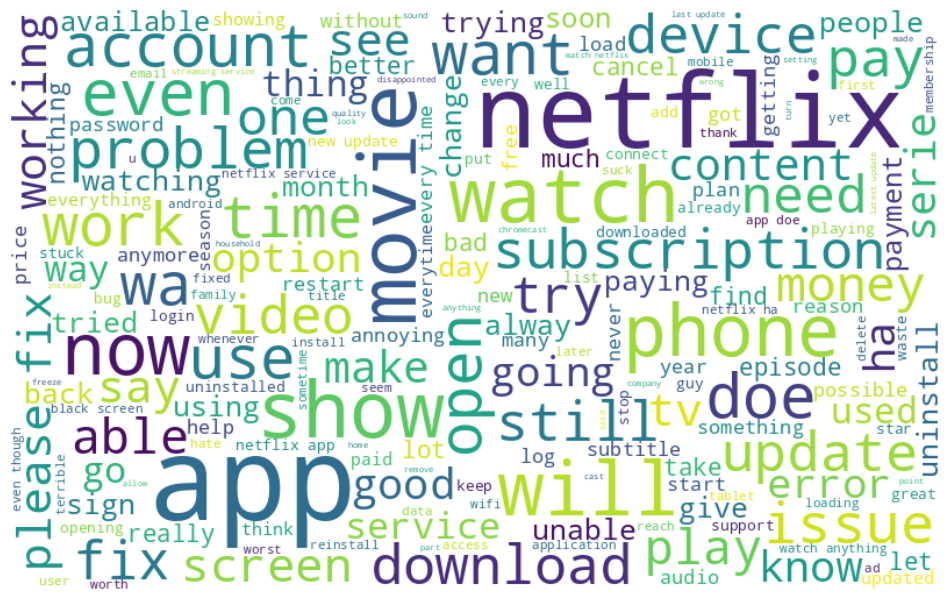

In [34]:
reviews= ' '.join(words for words in data['content'][data['score']== 'negative'].astype(str))
worldcloud= WordCloud(width=800,height=500,max_font_size=100,background_color='white').generate(reviews)
plt.figure(figsize=(12,10))
plt.imshow(worldcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cannot open it on my other...,negative,0
2,i have been trying to install this app it doe ...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [36]:
# Downloading the punkt tokenizer (one-time download)
nltk.download('punkt')

def tokenize_text(text):

  tokens = nltk.word_tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(tokenize_text)

In [38]:
data.head()

,content,score,thumbsUpCount
0,"[this, is, amazing, app]",positive,0
1,"[unsubscribing, now, i, can, not, open, it, on...",negative,0
2,"[i, have, been, trying, to, install, this, app...",negative,0
3,"[great, app, 🔥]",positive,0
4,"[no, me, dejaba, ver, nada, porque, no, estaba...",negative,0


In [39]:
data['content'].str.len()

0          4
1         14
2         13
3          3
4         11
          ..
109206    15
109207    10
109208     7
109209    16
109210    12
Name: content, Length: 109211, dtype: int64

In [40]:
#import Word2vec from gensim library
from gensim.models.word2vec import Word2Vec

In [41]:
text_corpus = data['content'].tolist() # Converting to list of lists

In [43]:
# Training the word2vec model
embedding_model = Word2Vec(text_corpus, min_count=1, window=10, vector_size=500, sg=1)  # sg=1 for skip-gram

In [44]:
#Getting word embeddings and similar words
word = "happy"
word_vector = embedding_model.wv[word]  # Get vector for a specific word
similar_words = embedding_model.wv.most_similar(word, topn=5)
print(f"Similar words to '{word}': {similar_words}")

Similar words to 'happy': [('satisfied', 0.6986013054847717), ('pleased', 0.6684043407440186), ('disapointed', 0.6539725065231323), ('thankful', 0.6480131149291992), ('excited', 0.6457198858261108)]


In [45]:
#Saving the model for later use
#Saving in google drive
embedding_model.save("drive/My Drive/Dataset/sentiment_analysis_model.bin")  # Saving in binary format # already saved so i just comment it

In [46]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

In [47]:
# Load your preprocessed DataFrame 'content' is the text column, 'score' is the targeted column
content = data['content'].tolist()
features = data['score']

In [48]:
# Defining maximum vocabulary size and sequence length
max_features = 52679 # Adjusting this based on your vocabulary size
maxlen = 100  # Adjusting this based on your average sentence length


In [49]:
# Tokenizer for converting text to sequences of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(content)
content_sequences = tokenizer.texts_to_sequences(content)

In [50]:
# Padding sequences to a fixed length
content_padded = pad_sequences(content_sequences, maxlen=maxlen, padding='post')

In [51]:
# Loading Pre-trained Word Embeddings from Google Drive
word_embedding_path = 'drive/My Drive/Dataset/sentiment_analysis_model.bin'
embedding_dim = 500

In [52]:
# Creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [53]:
# Fitting the encoder on the feature data (reshape for single feature)
encoder.fit(data['score'].values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [54]:
# Transforming the feature data into a one-hot encoded representation
encoded_features = encoder.transform(data['score'].values.reshape(-1, 1))

In [55]:
encoded_features

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [56]:
def load_word_embeddings(embedding_model, embedding_dim):

  # Get the vocabulary from the loaded model
  vocabulary = list(embedding_model.wv.key_to_index)

  # Create the embedding matrix with zeros
  embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

  # Fill the embedding matrix with word vectors from the model
  for i, word in enumerate(vocabulary):
    if word in embedding_model.wv:  # Check if word exists in the model's vocabulary
      embedding_matrix[i] = embedding_model.wv[word]

  return embedding_matrix

In [57]:
# Load word embeddings using the function
embedding_matrix = load_word_embeddings(embedding_model, embedding_dim)

In [58]:
# Defining the LSTM Model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, weights=[embedding_matrix], trainable=False))  # Text feature
model.add(LSTM(64, return_sequences=True))  # 64 hidden units, return sequences for next LSTM layer
model.add(LSTM(32))  # 32 hidden units in the second LSTM layer
model.add(Dense(encoded_features.shape[1], activation='sigmoid'))

In [59]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
# Train the model
history=model.fit(content_padded, encoded_features, epochs=15, batch_size=45, validation_split=0.2)

Epoch 1/15
1942/1942 [==============================] - 411s 209ms/step - loss: 0.6881 - accuracy: 0.5300 - val_loss: 0.6035 - val_accuracy: 0.7340
Epoch 2/15
1942/1942 [==============================] - 399s 206ms/step - loss: 0.5346 - accuracy: 0.7100 - val_loss: 0.3508 - val_accuracy: 0.8447
Epoch 3/15
1942/1942 [==============================] - 403s 207ms/step - loss: 0.4049 - accuracy: 0.8227 - val_loss: 0.3287 - val_accuracy: 0.8573
Epoch 4/15
1942/1942 [==============================] - 402s 207ms/step - loss: 0.3781 - accuracy: 0.8356 - val_loss: 0.3223 - val_accuracy: 0.8604
Epoch 5/15
1942/1942 [==============================] - 385s 198ms/step - loss: 0.3623 - accuracy: 0.8435 - val_loss: 0.3141 - val_accuracy: 0.8648
Epoch 6/15
1942/1942 [==============================] - 396s 204ms/step - loss: 0.3490 - accuracy: 0.8508 - val_loss: 0.3122 - val_accuracy: 0.8702
Epoch 7/15
1942/1942 [==============================] - 399s 206ms/step - loss: 0.3366 - accuracy: 0.8575 - val_

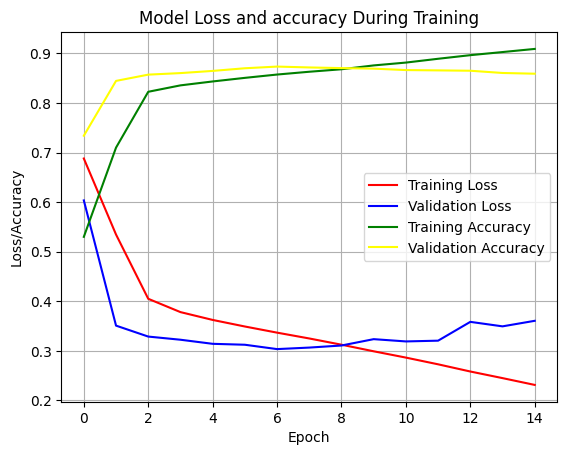

In [62]:
# Accessing training loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Accessing validation loss and accuracy
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


# Create the plot
plt.plot(train_loss, label='Training Loss',color='red')
plt.plot(val_loss, label='Validation Loss',color='blue')
plt.plot(train_accuracy, label='Training Accuracy',color='green')
plt.plot(val_accuracy, label='Validation Accuracy',color='yellow')

# Customize the plot
plt.title('Model Loss and accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')  # Adjusted label for combined plot
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [64]:
import pickle
# Define filename for the pickle file
filename = 'drive/My Drive/Dataset/sentiment_analysis_model.pkl'

# Open the file in binary write mode
with open(filename, 'wb') as file:
    # Pickle the model (using highest protocol version for compatibility)
    pickle.dump(model, file, pickle.HIGHEST_PROTOCOL)

print(f'Model saved to pickle file: {filename}')

Model saved to pickle file: drive/My Drive/Dataset/sentiment_analysis_model.pkl
